In [1]:
# initial settings

# setting the working directory
setwd("~/Desktop/ML_Workshop/Codes")

# Note the installation of the forecast packages takes a while
libary_path <- paste(getwd(), "packages",sep="/")
dir.create(libary_path,showWarnings = FALSE)
.libPaths(libary_path)

if(!require(tidyverse)){
    install.packages("tidyverse")
    library(tidyverse)
}
if(!require(repr)){
    install.packages("repr")
    library(repr)
}
if(!require(forecast)){
    install.packages("forecast",verbose=TRUE)
    library(forecast)
}
if(!require(lubridate)){
    install.packages("lubridate")
    library(lubridate)
}
if(!require(ggrepel)){
    install.packages("ggrepel")
    library(ggrepel)
}

# Plot size depending on your screen resolution to 5 x 5
options(repr.plot.width=5, repr.plot.height=5)


Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: repr

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: ggrepel



In [2]:
# turning off the warnings
options(warn=-1)
#options(warn=0) # to turn warnings back on

# Welcome to Day 1 ML Workshop 

## Exercise 1: Slide Example



In [3]:
car.df <- read.csv("ToyotaCorolla.csv")
# use first 1000 rows of data
car.df <- car.df[1:1000, ]
# select variables for regression
selected.var <- c(3, 4, 7, 8, 9, 10, 12, 13, 14, 17, 18)


In [4]:
# partition data
set.seed(1)  # set seed for reproducing the partition
train.index <- sample(c(1:1000), 600)
train.df <- car.df[train.index, selected.var]
valid.df <- car.df[-train.index, selected.var]

In [5]:
# use lm() to run a linear regression of Price on all 11 predictors in the
# training set.
# use . after ~ to include all the remaining columns in train.df as predictors.
car.lm <- lm(Price ~ ., data = train.df)
#  use options() to ensure numbers are not displayed in scientific notation.
options(scipen = 999)
summary(car.lm)


Call:
lm(formula = Price ~ ., data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9781.2  -729.9     0.9   739.3  6912.9 

Coefficients:
                    Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)     -4754.379821  1661.719608  -2.861             0.004372 ** 
Age_08_04        -133.271592     4.901960 -27.187 < 0.0000000000000002 ***
KM                 -0.020992     0.002304  -9.111 < 0.0000000000000002 ***
Fuel_TypeDiesel   896.206322   603.164063   1.486             0.137857    
Fuel_TypePetrol  2191.368250   575.629429   3.807             0.000155 ***
HP                 37.257956     5.233283   7.119     0.00000000000317 ***
Met_Color          51.315188   123.395390   0.416             0.677664    
Automatic          63.567598   262.282017   0.242             0.808583    
CC                  0.010747     0.097711   0.110             0.912456    
Doors             -55.700492    63.966255  -0.871             0.384230    
Quarterly_Tax     

In [6]:
library(forecast)
# use predict() to make predictions on a new set.
car.lm.pred <- predict(car.lm, valid.df)
options(scipen=999, digits = 0)
some.residuals <- valid.df$Price[1:20] - car.lm.pred[1:20]
data.frame("Predicted" = car.lm.pred[1:20], "Actual" = valid.df$Price[1:20],
    "Residual" = some.residuals)
options(scipen=999, digits = 3)
# use accuracy() to compute common accuracy measures.
accuracy(car.lm.pred, valid.df$Price)

,Predicted,Actual,Residual
,<dbl>,<int>,<dbl>
2,16447,13750,-2697
7,16757,16900,143
8,16750,18600,1850
9,20959,21500,541
10,14350,12950,-1400
12,21124,19950,-1174
13,20964,19600,-1364
14,20408,21500,1092
18,16817,17950,1133


,ME,RMSE,MAE,MPE,MAPE
Test set,19.6,1325,1049,-0.75,9.35


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



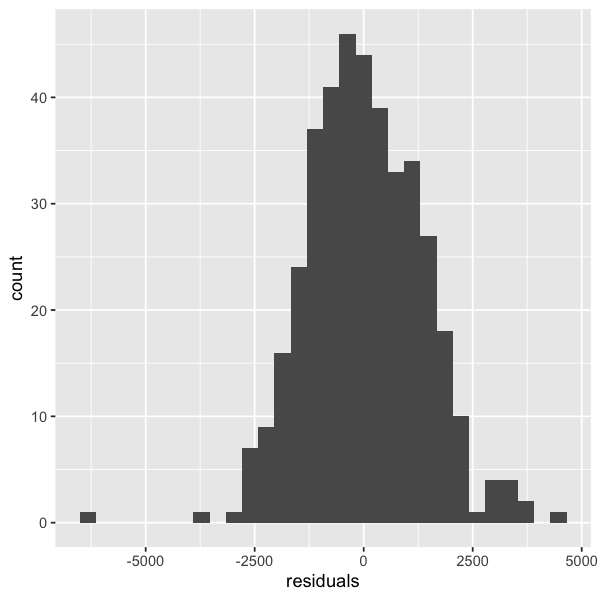

In [7]:
car.lm.pred <- predict(car.lm, valid.df)
residuals <- valid.df$Price - car.lm.pred
residuals.df <- data.frame(residuals)
ggplot(data=residuals.df,
      aes(x=residuals)) +
        geom_histogram()


#### Checking the linear regression assumptions

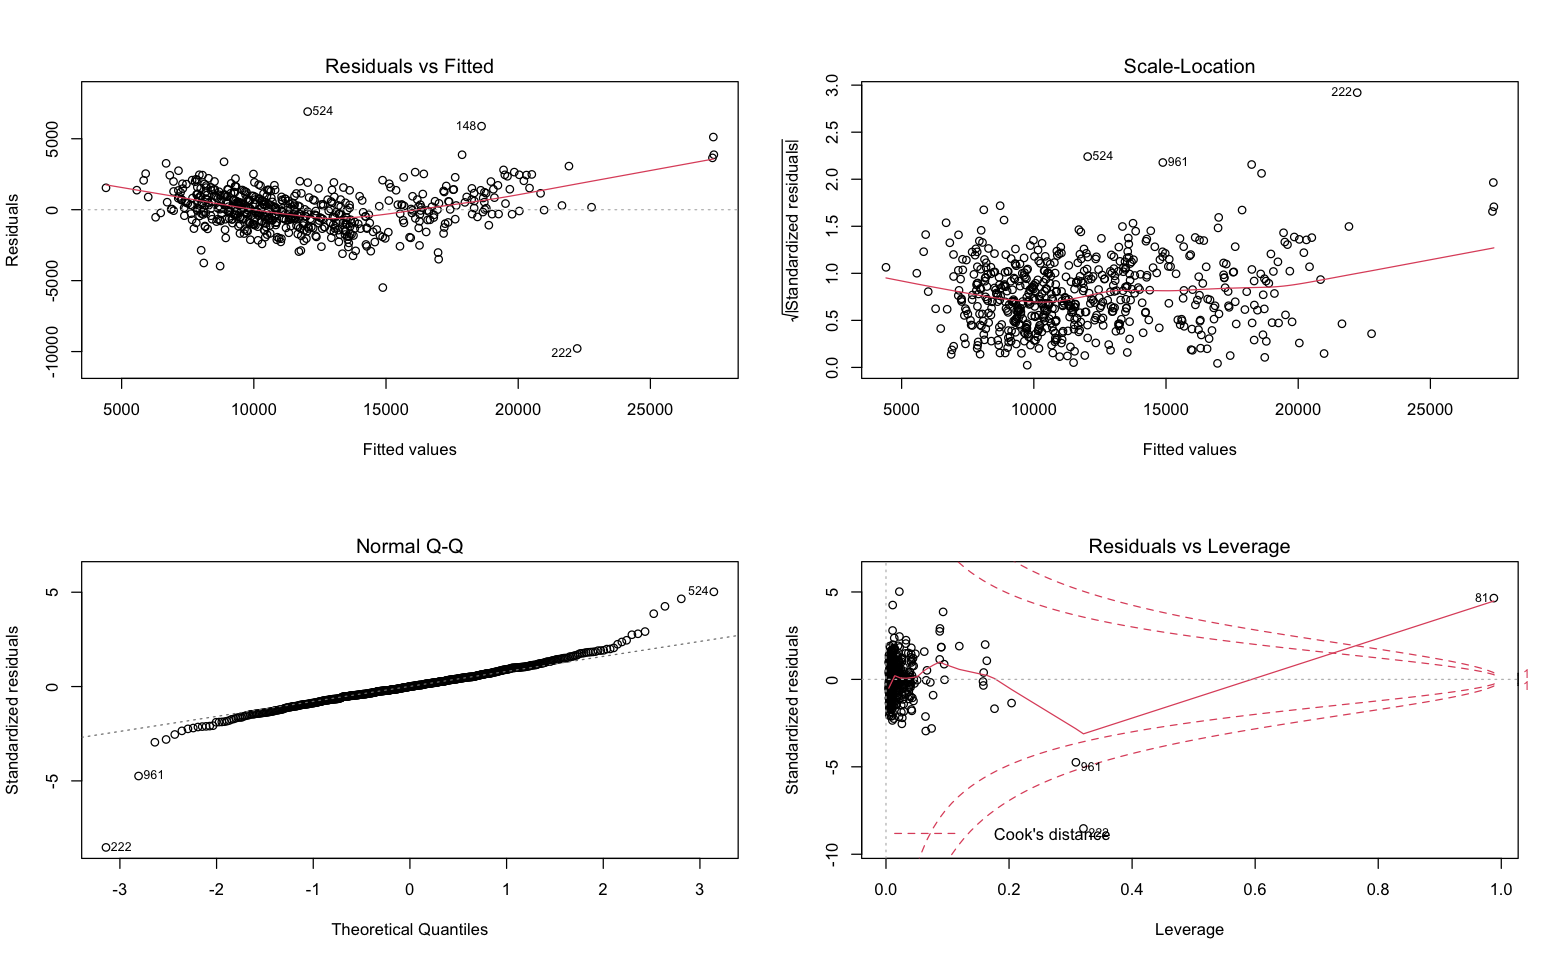

In [8]:
# adjusting the plotting size
options(repr.plot.width=13, repr.plot.height=8)

# Using the plot() function to produce diagnostic plots of the linear regression fit
par(mfcol=c(2,2))
plot(car.lm)

Let's check the linear regression assumptions given the results of graphs below: 

* <font color="red">Linearity</font> ("Residuals vs Fitted") --> It shows that residuals have an almost linear pattern. So, the linear model is appropriate to model the relationship between the predictors and the response variable.
* <font color="red">Normality</font> ("Normal Q-Q") --> Normal Q-Q plot is used to check the assumption that our dependent variable is or isn't Normally distributed. As we have aan almost perfect straight line, so it seems that the residuals might be considered slight normally distributed. If not, we need to transform the target variable (e.g., applying the log transformation) in order to improve the prediction results.
* <font color="red">Constant variance</font> ("Scale-Location") --> here, we look for an horizontal line, to have the assumption of constant variance (condition of residuals being randomly spread). In this case is not bad.

In conclusion, linear regression can be considered a suited model for this dataset.

## Exercise 2: With the support of plotting


Load the file `EconDataPop.csv`. This files provides economic data across countries.  
Here is a translation of region names:
* Americas
* Asia_pac	(Asia-Pacific)
* Eur_Asia	(East Europe and Central Asia)
* MENA		(Middle East and North Africa)
* SSA		(Sub-Saharan Africa)
* W_Eur		(Europe)    


Here is a translation of two of the variable names:
* HDI 		(Human Development Index)
* CPI		(Corruption Perceptions Index)



In [9]:
### BEGIN SOLUTION
econ.df <- read.table("EconDataPop.csv", header=TRUE, sep =",")
econ.df %>% head()
### END SOLUTION

,ID,Country,HDI.Rank,HDI,CPI,Region,Population
,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<int>
1,1,Afghanistan,172,0.398,1.5,Asia_Pac,27657145
2,2,Albania,70,0.739,3.1,W_Eur,2886026
3,3,Algeria,96,0.698,2.9,MENA,40400000
4,4,Angola,148,0.486,2.0,SSA,25789024
5,5,Argentina,45,0.797,3.0,Americas,43850000
6,6,Armenia,86,0.716,2.6,Eur_Asia,2993900


Create a scatter plot between HDI and CPI:


In [10]:
# Plot size depending on your screen resolution to 5 x 5
options(repr.plot.width=5, repr.plot.height=5)

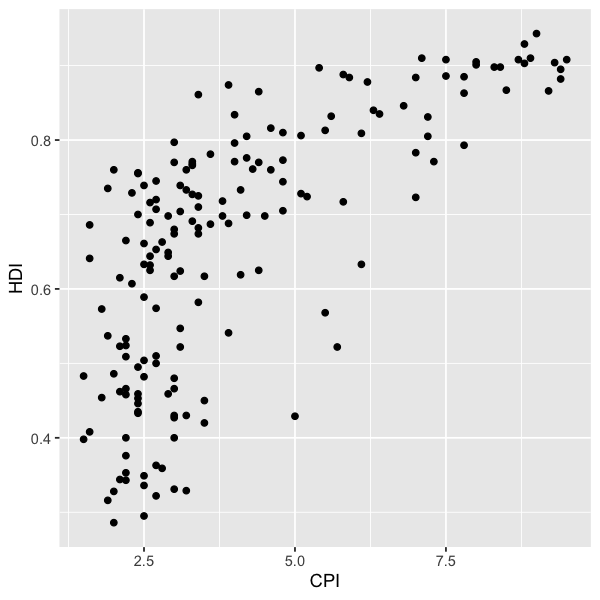

In [11]:
### BEGIN SOLUTION
ggplot(data = econ.df,
       aes(x = CPI, 
           y = HDI
       )
    )+ geom_point () 
### END SOLUTION

So far, we always added colour or text to the points. Another possibility is to vary the size of the points. For this, add as aesthetic mapping `colour=Region` and `size=Population`. The result is called a bubble-chart.



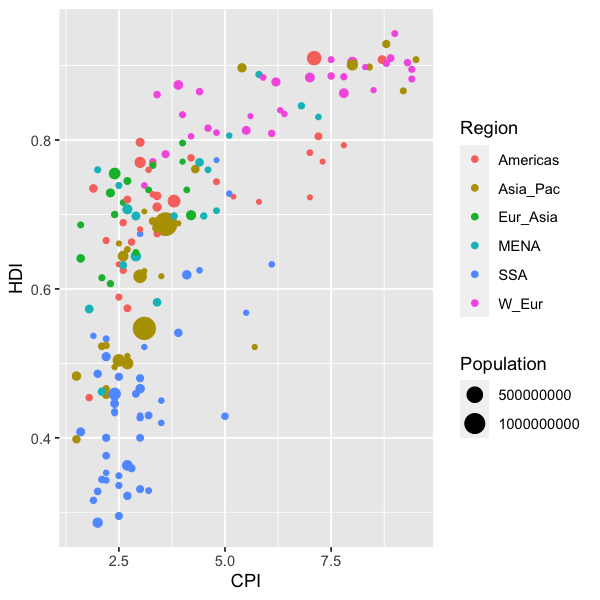

In [12]:
### BEGIN SOLUTION
p<-ggplot(data = econ.df,
       aes(x      = CPI, 
           y      = HDI,
           colour = Region,
           size   = Population))+
    geom_point () 
p
### END SOLUTION

Somehow the points are overlapping. For tuning of the plot, explore the transparency. You can do this with `alpha=0.5` inside geom_point (values from 0-1). In addition, a scale can be included by adding `+ scale_size(range = c(0,15))` Try out a few values. Which one makes sense ?

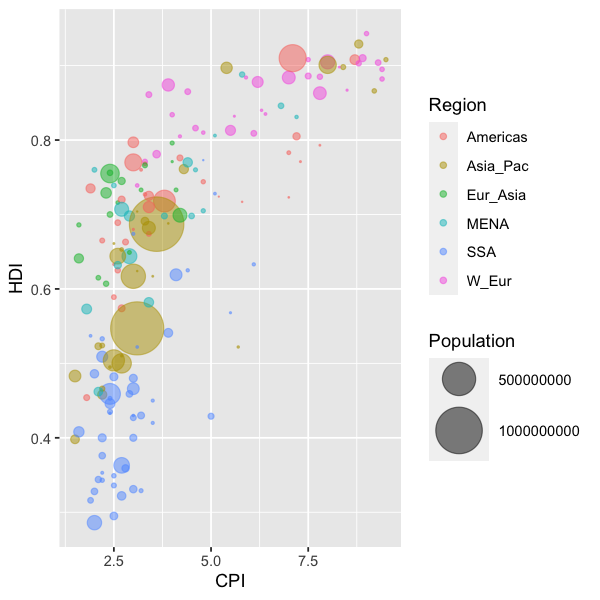

In [13]:
### BEGIN SOLUTION
p<-ggplot(data = econ.df,
       aes(x      = CPI, 
           y      = HDI,
           colour = Region,
           size   = Population))+
    geom_point (alpha=0.5) +
    scale_size(range = c(0,15))
p
### END SOLUTION

Next, what kind of line should go through this data? Let's start with a linear regression. In the first stage, let's calculate it seperately and add it as a column to the `econ.df`. To run a simple regression, the syntax is:


In [14]:
reg <- lm(HDI ~ CPI, data=econ.df)
reg


Call:
lm(formula = HDI ~ CPI, data = econ.df)

Coefficients:
(Intercept)          CPI  
     0.4212       0.0585  


In [15]:
# or for more complete results
summary(reg)


Call:
lm(formula = HDI ~ CPI, data = econ.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2845 -0.0838  0.0137  0.0916  0.2410 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   0.4212     0.0206    20.5 <0.0000000000000002 ***
CPI           0.0585     0.0045    13.0 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.125 on 171 degrees of freedom
Multiple R-squared:  0.497,	Adjusted R-squared:  0.494 
F-statistic:  169 on 1 and 171 DF,  p-value: <0.0000000000000002


To use this simple model for prediction, call predict(reg) and assign it to the data frame as column called `linearFit`.

In [16]:
### BEGIN SOLUTION
econ.df$linearFitHDI=predict(reg)
head(econ.df)
### END SOLUTION

,ID,Country,HDI.Rank,HDI,CPI,Region,Population,linearFitHDI
,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,1,Afghanistan,172,0.398,1.5,Asia_Pac,27657145,0.509
2,2,Albania,70,0.739,3.1,W_Eur,2886026,0.602
3,3,Algeria,96,0.698,2.9,MENA,40400000,0.591
4,4,Angola,148,0.486,2.0,SSA,25789024,0.538
5,5,Argentina,45,0.797,3.0,Americas,43850000,0.597
6,6,Armenia,86,0.716,2.6,Eur_Asia,2993900,0.573


To plot this column, add    
`geom_line(aes(y      = linearFitHDI,
               colour = NULL,
               size   = NULL))
`  
Here we inherit the mappings from the previous layers and overwrite the values we want to change.                  

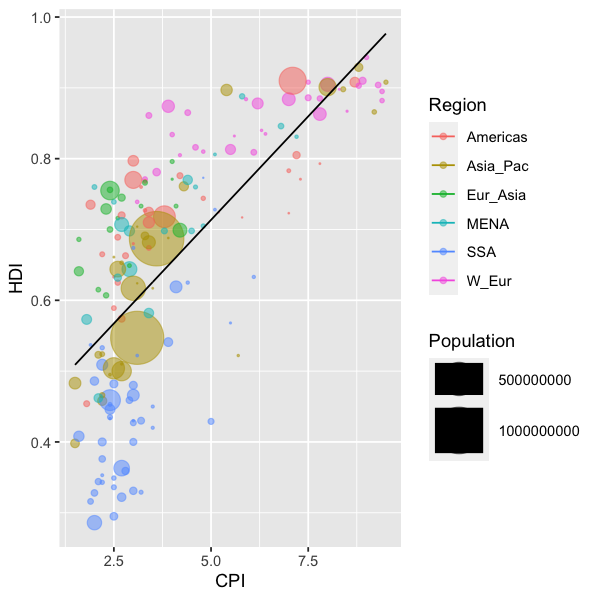

In [17]:
### BEGIN SOLUTION
p<-ggplot(data = econ.df,
       aes(x      = CPI, 
           y      = HDI,
           colour = Region,
           size   = Population)) +
    geom_point (alpha=0.5) +
    scale_size(range = c(0,15)) +
    geom_line(aes(y      = linearFitHDI,
                  colour = NULL,
                  size   = NULL))
p
### END SOLUTION

What happend? You will see that we have inherited settings for the legend but it changed. Let's fix this. Specify only the `x` and `y` in the first `aes` mapping and specify the geometric shape specific options geom_point seperately (e.g. colour)  

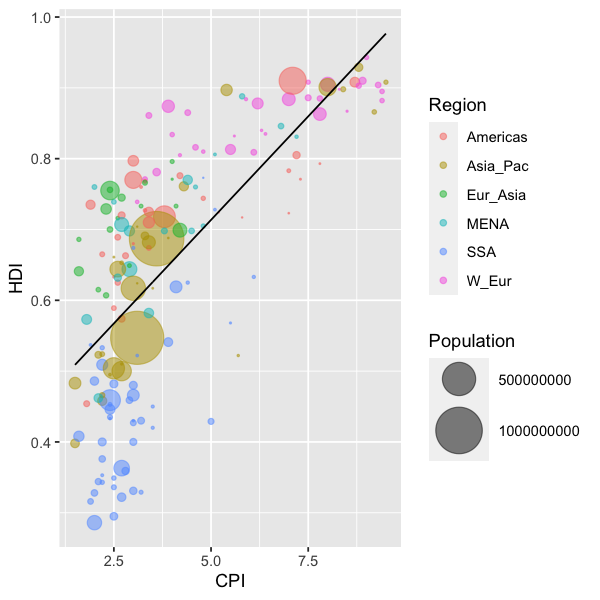

In [18]:
### BEGIN SOLUTION
ggplot(data = econ.df,
       aes(x      = CPI, 
           y      = HDI)) +
    geom_point (alpha=0.5,
       aes(colour = Region,
           size   = Population)) +
    scale_size(range = c(0,15)) +
    geom_line(aes(y = linearFitHDI))
### END SOLUTION

What do you think about this fit? Let's try a loess curve (local polynomial regression with a confidence interval pointwise). Replace the line with `geom_smooth(method = 'loess')`


`geom_smooth()` using formula 'y ~ x'



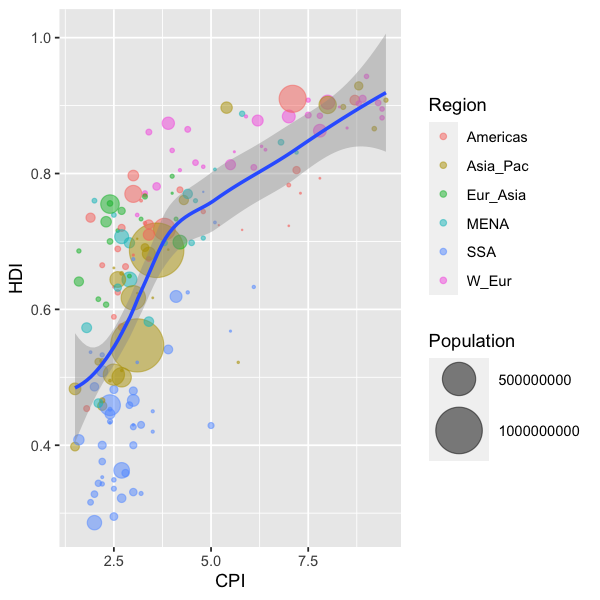

In [19]:
### BEGIN SOLUTION
ggplot(data = econ.df,
       aes(x      = CPI, 
           y      = HDI)) +
    geom_point (alpha=0.5,
               aes(colour = Region,
                   size   = Population)) +
    scale_size(range = c(0,15)) +
    geom_smooth(method = 'loess')
### END SOLUTION

Let's try this again with `method="lm, method = 'lm', se=FALSE"`


`geom_smooth()` using formula 'y ~ x'



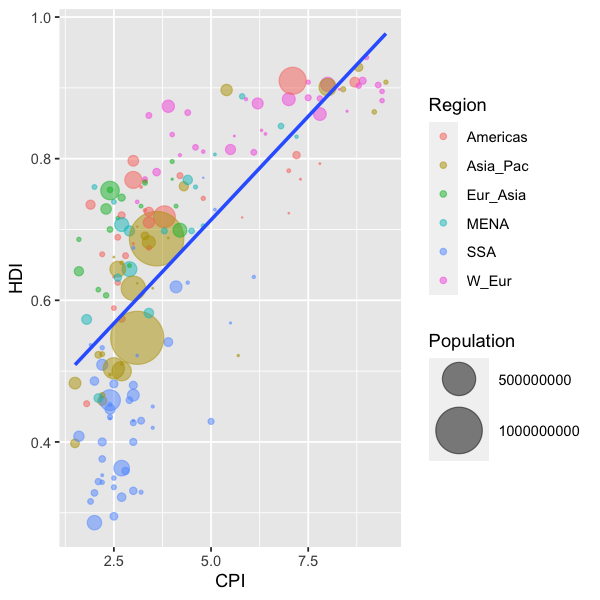

In [20]:
### BEGIN SOLUTION
ggplot(data = econ.df,
       aes(x      = CPI, 
           y      = HDI)) +
    geom_point (alpha=0.5,
       aes(colour = Region,
           size   = Population)) +
    scale_size(range = c(0,15)) +
    geom_smooth(method = 'lm', se=FALSE)
### END SOLUTION

How does this graph compare to the previous one ? By default the formula `y~x` is used. You can modify it by specifing `formula=` as an option. Let's try log scale: `formula = y~log(x)`

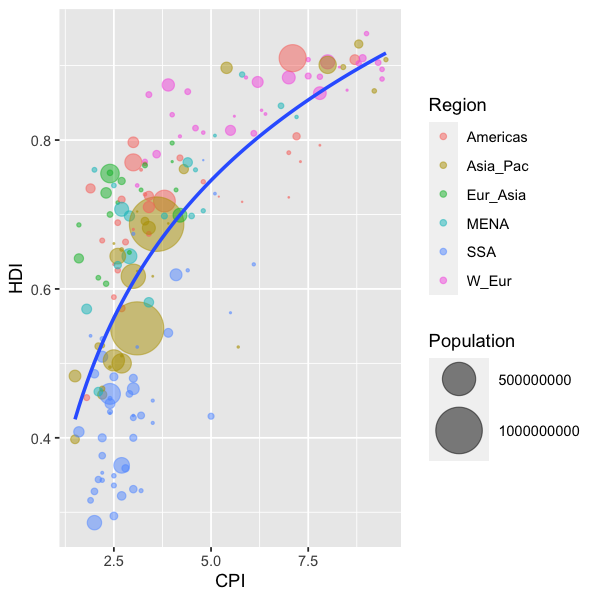

In [21]:
### BEGIN SOLUTION
ggplot(data = econ.df,
       aes(x      = CPI, 
           y      = HDI)) +
    geom_point (alpha=0.5,
       aes(colour = Region,
           size   = Population)) +
    scale_size(range = c(0,15)) +
    geom_smooth(method   = 'lm', 
                se       = FALSE,
                formula = y~log(x))
### END SOLUTION

## Exercise 3: Selecting the best model

Load the required libraries/packages.
If you don't have the package yet, install the package(s) below once on your machine. To do so, uncomment the `install.packages` line(s) below.

In [22]:
#install.packages("leaps")
#install.packages("gains")
#install.packages("forecast")
#install.packages("corrgram")
library(leaps) #for subset selection
library(gains) #for gains and lift chart
library(forecast) #for accuracy measures
library(corrgram) #for producing a graphical display of a correlation matrix

### Case 1: Predicting Boston Housing Prices. 

1. Load the file `BostonHousing.csv`. This contains information collected by the US Bureau of the Census concerning housing in the area of Boston, Massachusetts. 

The dataset includes information on 506 census housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as crime rate, pollution, and number of rooms. The dataset contains 13 predictors, and the response is the median house price (MEDV). 

In [23]:
# load the data and preprocess
housing.df <- read.csv("BostonHousing.csv")
head(housing.df)
t(names(housing.df))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT..MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,0.00632,18,2.31,0,0.538,6.58,65.2,4.09,1,296,15.3,4.98,24.0,0
2,0.02731,0,7.07,0,0.469,6.42,78.9,4.97,2,242,17.8,9.14,21.6,0
3,0.02729,0,7.07,0,0.469,7.18,61.1,4.97,2,242,17.8,4.03,34.7,1
4,0.03237,0,2.18,0,0.458,7.00,45.8,6.06,3,222,18.7,2.94,33.4,1
5,0.06905,0,2.18,0,0.458,7.15,54.2,6.06,3,222,18.7,5.33,36.2,1
6,0.02985,0,2.18,0,0.458,6.43,58.7,6.06,3,222,18.7,5.21,28.7,0


CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT..MEDV


In [24]:
# remove the categorical response variable CAT..MEDV
housing.df <- housing.df[,-c(14)]
t(names(housing.df))

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


2. Fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM. Write the equation for predicting the median house price from the predictors in the model.

In [25]:
# fit the model
reg <- lm(MEDV ~ CRIM + CHAS + RM, data = housing.df)
summary(reg)


Call:
lm(formula = MEDV ~ CRIM + CHAS + RM, data = housing.df)

Residuals:
   Min     1Q Median     3Q    Max 
-24.83  -2.97  -0.42   2.43  38.95 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -28.8107     2.5633  -11.24 < 0.0000000000000002 ***
CRIM         -0.2607     0.0327   -7.96    0.000000000000011 ***
CHAS          3.7630     1.0862    3.46              0.00058 ***
RM            8.2782     0.4018   20.60 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.17 on 502 degrees of freedom
Multiple R-squared:  0.553,	Adjusted R-squared:  0.55 
F-statistic:  207 on 3 and 502 DF,  p-value: <0.0000000000000002


###### ANSWER:
Regression equation is: 

MEDV = -28.81068 + (-0.26072 * CRIM) + (3.76304 * CHAS) + (8.27818 * RM)

3. Using the estimated regression model, what median house price is predicted for a tract in the Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6?

In [26]:
#median price for the new tract
print(reg$coef %*% c(1, 0.1, 0, 6))

     [,1]
[1,] 20.8


###### ANSWER: 
Therefore the median house price is $20,832.32.

In [27]:
# the prediction error of the new data is obtained by setting se.fit = TRUE in the predict() function
new <- data.frame(CHAS = 0, CRIM = 0.1, RM = 6)
pred <- predict(reg, newdata = new, se.fit = TRUE)
pred$fit

1 
20.8

In [28]:
# as shown above, the median house price is therefore $20,832.32.

# prediction error
pred$se.fit # prediction error is $334.8071

[1] 0.335

#### Reducing the number of predictors.

Which predictors are likely to be measuring the same thing among the 13 predictors? Discuss the relationships among INDUS, NOX, and TAX.

In [29]:
cor(housing.df[,c("CRIM","CHAS","RM")], housing.df)
cor(housing.df[,c("INDUS", "NOX", "TAX")])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.62551,0.5828,0.290,0.4556,-0.388
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.00737,-0.0356,-0.122,-0.0539,0.175
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.20985,-0.2920,-0.356,-0.6138,0.695


,INDUS,NOX,TAX
INDUS,1.000,0.764,0.721
NOX,0.764,1.000,0.668
TAX,0.721,0.668,1.000


In [30]:
#correlation table for the 12 numerical predictors
(t(names(housing.df)))
cor(housing.df[,-c(4)])

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,0.604,-0.484
NOX,0.421,-0.517,0.764,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,0.591,-0.427
RM,-0.219,0.312,-0.392,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,-0.614,0.695
AGE,0.353,-0.570,0.645,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,-0.497,0.250
RAD,0.626,-0.312,0.595,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,0.489,-0.382
TAX,0.583,-0.315,0.721,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,0.544,-0.469
PTRATIO,0.290,-0.392,0.383,0.189,-0.356,0.262,-0.232,0.465,0.461,1.000,0.374,-0.508


Highly correlated pairs are as follows:

1. NOX and INDUS: Correlation coefficient = 0.76365
2. TAX and INDUS: Correlation coefficient = 0.72076
3. AGE and NOX: Correlation coefficient = 0.73147
4. DIS and NOX: Correlation coefficient = -0.76923
5. DIS and AGE: Correlation coefficient = -0.74788
6. TAX and RAD: Correlation coefficient = 0.91022

According to the correlation table, we might be able to remove some variables that do not add much information to others that we keep. We might remove INDUS, AGE and TAX.

#### Stepwise regression

Use stepwise regression with the three options (backward, forward, both) to reduce the remaining predictors as follows: 

- Run stepwise on the training set. Choose the top model from each stepwise run. 
- Then use each of these models separately to predict the validation set. 
- Compare RMSE, MAPE, and mean error, as well as lift charts. 
- Finally, describe the best model.

In [31]:
#library(leaps)

# partition data
set.seed(1)  
train.index <- sample(c(1:dim(housing.df)[1]), 
                      0.6*dim(housing.df)[1])  
valid.index <- setdiff(c(1:dim(housing.df)[1]), train.index)  
train.df <- housing.df[train.index, ]
valid.df <- housing.df[valid.index, ]

In [32]:
# stepwise regression with exhaustive search
search <- regsubsets(MEDV ~ .,
                     data = housing.df,
                     nbest = 1,
                     nvmax = dim(train.df)[2],
                     method = "exhaustive")



In [33]:
sum <- summary(search)
sum$which

,(Intercept),CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
4,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
5,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
6,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
7,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
8,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
9,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE


To find the top three models, the criteria used is as follows:
- Find the 3 highest values of adjusted R-squared

In [34]:
t(t(sum$adjr2))
# top 3 models
models <-  order(sum$adjr2, decreasing = T)[1:3]
models

0.543
0.637
0.677
0.688
0.705
0.712
0.716
0.719
0.723
0.729
0.728


[1] 10 11 12

[1] 10
[1] 4.95
[1] 18.6
[1] 5.25
[1] 19
[1] 11
[1] 4.74
[1] 17.7
[1] 4.91
[1] 17.9
[1] 12
[1] 4.64
[1] 17.5
[1] 4.94
[1] 17.4


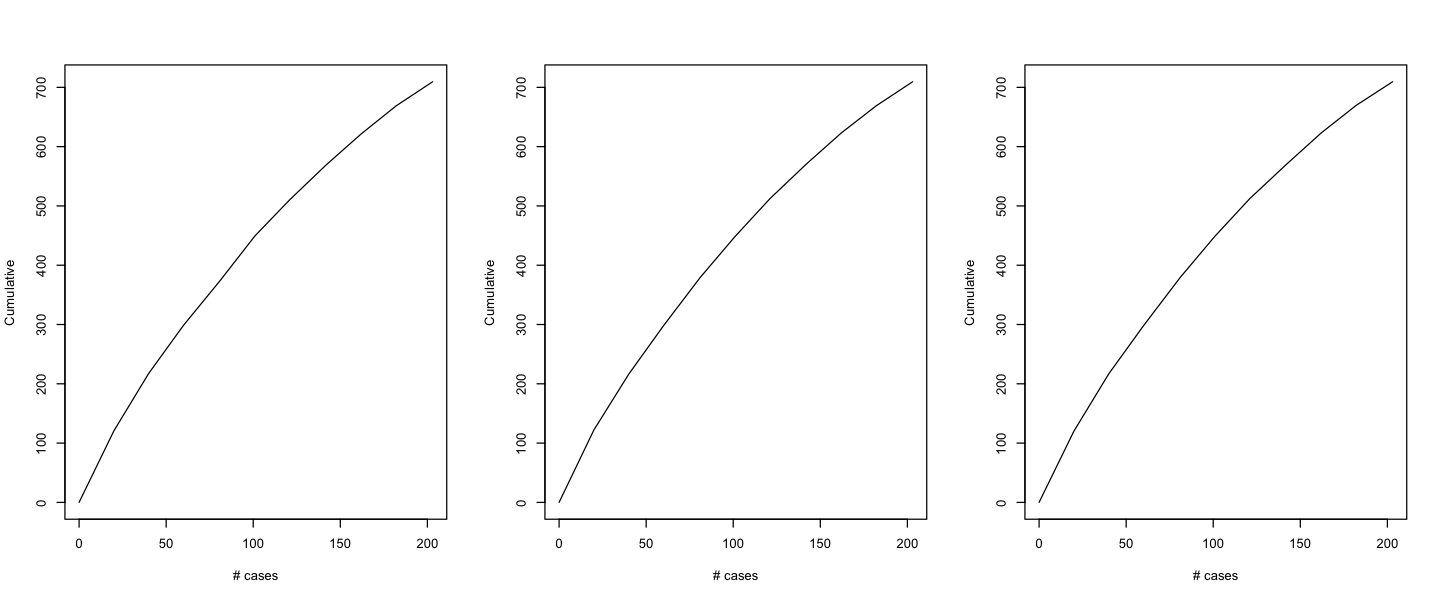

In [35]:
library(gains) #for gains and lift chart

# Plot size deppening on your screen resolution to 5 x 3
options(repr.plot.width=12, repr.plot.height=5)

# run model on training and validation
par(mfcol=c(1,3))
for (model in models){
  print(model) #print model number
  selected.vars = names(train.df)[sum$which[model,]]
  reg.model <- lm(MEDV ~ ., data = train.df[,selected.vars])
  
  # training
  print(accuracy(reg.model$fitted.values, train.df$MEDV)[2]) #print RMSE
  print(accuracy(reg.model$fitted.values, train.df$MEDV)[5]) #print MAPE
  
  # validation
  pred <- predict(reg.model, valid.df)
  print(accuracy(pred, valid.df$MEDV)[2]) #print RMSE
  print(accuracy(pred, valid.df$MEDV)[5]) #print MAPE
  
  #lift charts
  gain <- gains(valid.df$MEDV, pred)
  plot(c(0, gain$cume.pct.of.total*sum(valid.df$CRIM)) ~ 
         c(0, gain$cume.obs), 
       xlab="# cases", ylab="Cumulative", main="", type="l")
}

Summary of top three models to choose the best model:
- Model 1 is designed using the following 10 variables: CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, LSTAT. 
- Model 2 is designed using the following 11 variables: CRIM, ZN, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT. 
- Model 3 is designed using the following 12 variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT.

But alternatively, we can use `step()` function from package `stats` to perform stepwise regression stepwise regression with backward search. 

Best model decided according to AIC you can either leave default settings or mention direction = "backward" in `step()` function for **backward search**. Both will result in backward search.

In [36]:
library(stats)

# fit the model with all the variables first.
reg2 <- lm(MEDV ~ ., data = train.df)

# backward regression
step.backward <- step(reg2, direction = "backward")

summary(step.backward)

Start:  AIC=956
MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + 
    TAX + PTRATIO + LSTAT

          Df Sum of Sq  RSS  AIC
- AGE      1         1 6528  954
- INDUS    1         3 6531  954
<none>                 6528  956
- ZN       1        80 6608  958
- CRIM     1       111 6639  959
- NOX      1       209 6736  964
- TAX      1       212 6739  964
- CHAS     1       288 6815  967
- RAD      1       294 6822  968
- DIS      1       575 7103  980
- PTRATIO  1       627 7155  982
- RM       1      1216 7744 1006
- LSTAT    1      1650 8178 1023

Step:  AIC=954
MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + 
    PTRATIO + LSTAT

          Df Sum of Sq  RSS  AIC
- INDUS    1         3 6532  952
<none>                 6528  954
- ZN       1        79 6608  956
- CRIM     1       111 6640  957
- TAX      1       211 6739  962
- NOX      1       214 6742  962
- CHAS     1       291 6819  965
- RAD      1       295 6824  966
- PTRATIO  1       631 7160  980



Call:
lm(formula = MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + 
    TAX + PTRATIO + LSTAT, data = train.df)

Residuals:
   Min     1Q Median     3Q    Max 
-9.713 -2.678 -0.456  1.930 22.989 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  36.88688    6.37884    5.78      0.0000000188861 ***
CRIM         -0.09925    0.04395   -2.26              0.02467 *  
ZN            0.03349    0.01808    1.85              0.06492 .  
CHAS          3.82477    1.04939    3.64              0.00032 ***
NOX         -14.57833    4.71447   -3.09              0.00218 ** 
RM            4.03900    0.53372    7.57      0.0000000000005 ***
DIS          -1.37551    0.24054   -5.72      0.0000000265663 ***
RAD           0.28551    0.07800    3.66              0.00030 ***
TAX          -0.01323    0.00411   -3.22              0.00144 ** 
PTRATIO      -0.90300    0.17044   -5.30      0.0000002309311 ***
LSTAT        -0.57643    0.06283   -9.17 < 0.0000000000000002

The best model according to backward search algorithm is:

- Step:  AIC=930.63
- MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + LSTAT


In [37]:
# predictions on validation set
lm1 <- lm(MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO 
          + LSTAT, data = train.df)

pred1.valid <- predict(lm1, data = valid.df)

accuracy(pred1.valid, valid.df$MEDV)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.282,12.3,9.63,-16.9,49.5


In [38]:
lm0 <- lm(MEDV ~ ., data = train.df)
pred0.valid <- predict(lm0, data = valid.df)

accuracy(pred0.valid, valid.df$MEDV)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.283,12.3,9.64,-16.9,49.5


Stepwise regression with **forward search**. Best model decided according to AIC set the direction parameter to "forward" in `step()` function for forward search. 

In [39]:
#forward regression
step.forward <- step(reg2, direction = "forward")
summary(step.forward)


Start:  AIC=956
MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + 
    TAX + PTRATIO + LSTAT




Call:
lm(formula = MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + 
    DIS + RAD + TAX + PTRATIO + LSTAT, data = train.df)

Residuals:
   Min     1Q Median     3Q    Max 
-9.706 -2.738 -0.438  1.907 22.996 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  37.04996    6.42253    5.77 0.00000002046632673 ***
CRIM         -0.09808    0.04418   -2.22             0.02719 *  
ZN            0.03461    0.01834    1.89             0.06012 .  
INDUS         0.02988    0.07737    0.39             0.69967    
CHAS          3.78207    1.05789    3.58             0.00041 ***
NOX         -15.24158    5.00680   -3.04             0.00255 ** 
RM            4.03444    0.54886    7.35 0.00000000000202147 ***
AGE           0.00307    0.01717    0.18             0.85833    
DIS          -1.33621    0.26438   -5.05 0.00000076650605826 ***
RAD           0.29551    0.08175    3.61             0.00035 ***
TAX          -0.01404    0.00458   -3.07             0.002

The best model according to forward search algorithm is:
- Start:  AIC=934.46
- MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + LSTAT

In [40]:
# predictions on validation set
lm2 <- lm(MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + 
            TAX + PTRATIO + LSTAT, data = train.df)
pred2.valid <- predict(lm2, data = valid.df)
accuracy(pred2.valid, valid.df$MEDV)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.283,12.3,9.64,-16.9,49.5


In [41]:
accuracy(pred1.valid, valid.df$MEDV)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.282,12.3,9.63,-16.9,49.5


Best model decided according to AIC set the direction parameter to **"both"** in `step()` function. 

In [42]:
# stepwise regression in both the directions.
step.both <- step(reg2, direction = "both")
summary(step.both)

Start:  AIC=956
MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + 
    TAX + PTRATIO + LSTAT

          Df Sum of Sq  RSS  AIC
- AGE      1         1 6528  954
- INDUS    1         3 6531  954
<none>                 6528  956
- ZN       1        80 6608  958
- CRIM     1       111 6639  959
- NOX      1       209 6736  964
- TAX      1       212 6739  964
- CHAS     1       288 6815  967
- RAD      1       294 6822  968
- DIS      1       575 7103  980
- PTRATIO  1       627 7155  982
- RM       1      1216 7744 1006
- LSTAT    1      1650 8178 1023

Step:  AIC=954
MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + 
    PTRATIO + LSTAT

          Df Sum of Sq  RSS  AIC
- INDUS    1         3 6532  952
<none>                 6528  954
- ZN       1        79 6608  956
+ AGE      1         1 6528  956
- CRIM     1       111 6640  957
- TAX      1       211 6739  962
- NOX      1       214 6742  962
- CHAS     1       291 6819  965
- RAD      1       295 6824  966



Call:
lm(formula = MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + 
    TAX + PTRATIO + LSTAT, data = train.df)

Residuals:
   Min     1Q Median     3Q    Max 
-9.713 -2.678 -0.456  1.930 22.989 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  36.88688    6.37884    5.78      0.0000000188861 ***
CRIM         -0.09925    0.04395   -2.26              0.02467 *  
ZN            0.03349    0.01808    1.85              0.06492 .  
CHAS          3.82477    1.04939    3.64              0.00032 ***
NOX         -14.57833    4.71447   -3.09              0.00218 ** 
RM            4.03900    0.53372    7.57      0.0000000000005 ***
DIS          -1.37551    0.24054   -5.72      0.0000000265663 ***
RAD           0.28551    0.07800    3.66              0.00030 ***
TAX          -0.01323    0.00411   -3.22              0.00144 ** 
PTRATIO      -0.90300    0.17044   -5.30      0.0000002309311 ***
LSTAT        -0.57643    0.06283   -9.17 < 0.0000000000000002

The best model according to both direction search algorithm is:
- Step:  AIC=930.63
- MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + LSTAT

In [43]:
# predictions on validation set
lm3 <- lm(MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + 
            LSTAT, data = train.df)
pred3.valid <- predict(lm3, data = valid.df)
accuracy(pred3.valid, valid.df$MEDV)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.282,12.3,9.63,-16.9,49.5


In [44]:
accuracy(pred2.valid, valid.df$MEDV)
accuracy(pred1.valid, valid.df$MEDV)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.283,12.3,9.64,-16.9,49.5


,ME,RMSE,MAE,MPE,MAPE
Test set,0.282,12.3,9.63,-16.9,49.5


#### Conclusion:

According to AIC criterion, exhaustive and backward search gave the same best model with 10 predictors: CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO and LSTAT.